<a href="https://colab.research.google.com/github/sneraikar/EDA1/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem statement**

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
1. What can we learn about different hosts and areas?
2. What can we learn from predictions?
 (2.1 Type of room 
  2.2 locations,
  2.3 prices,
  2.4 reviews)
3. Which hosts are the busiest and why?
4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?
*  </b>

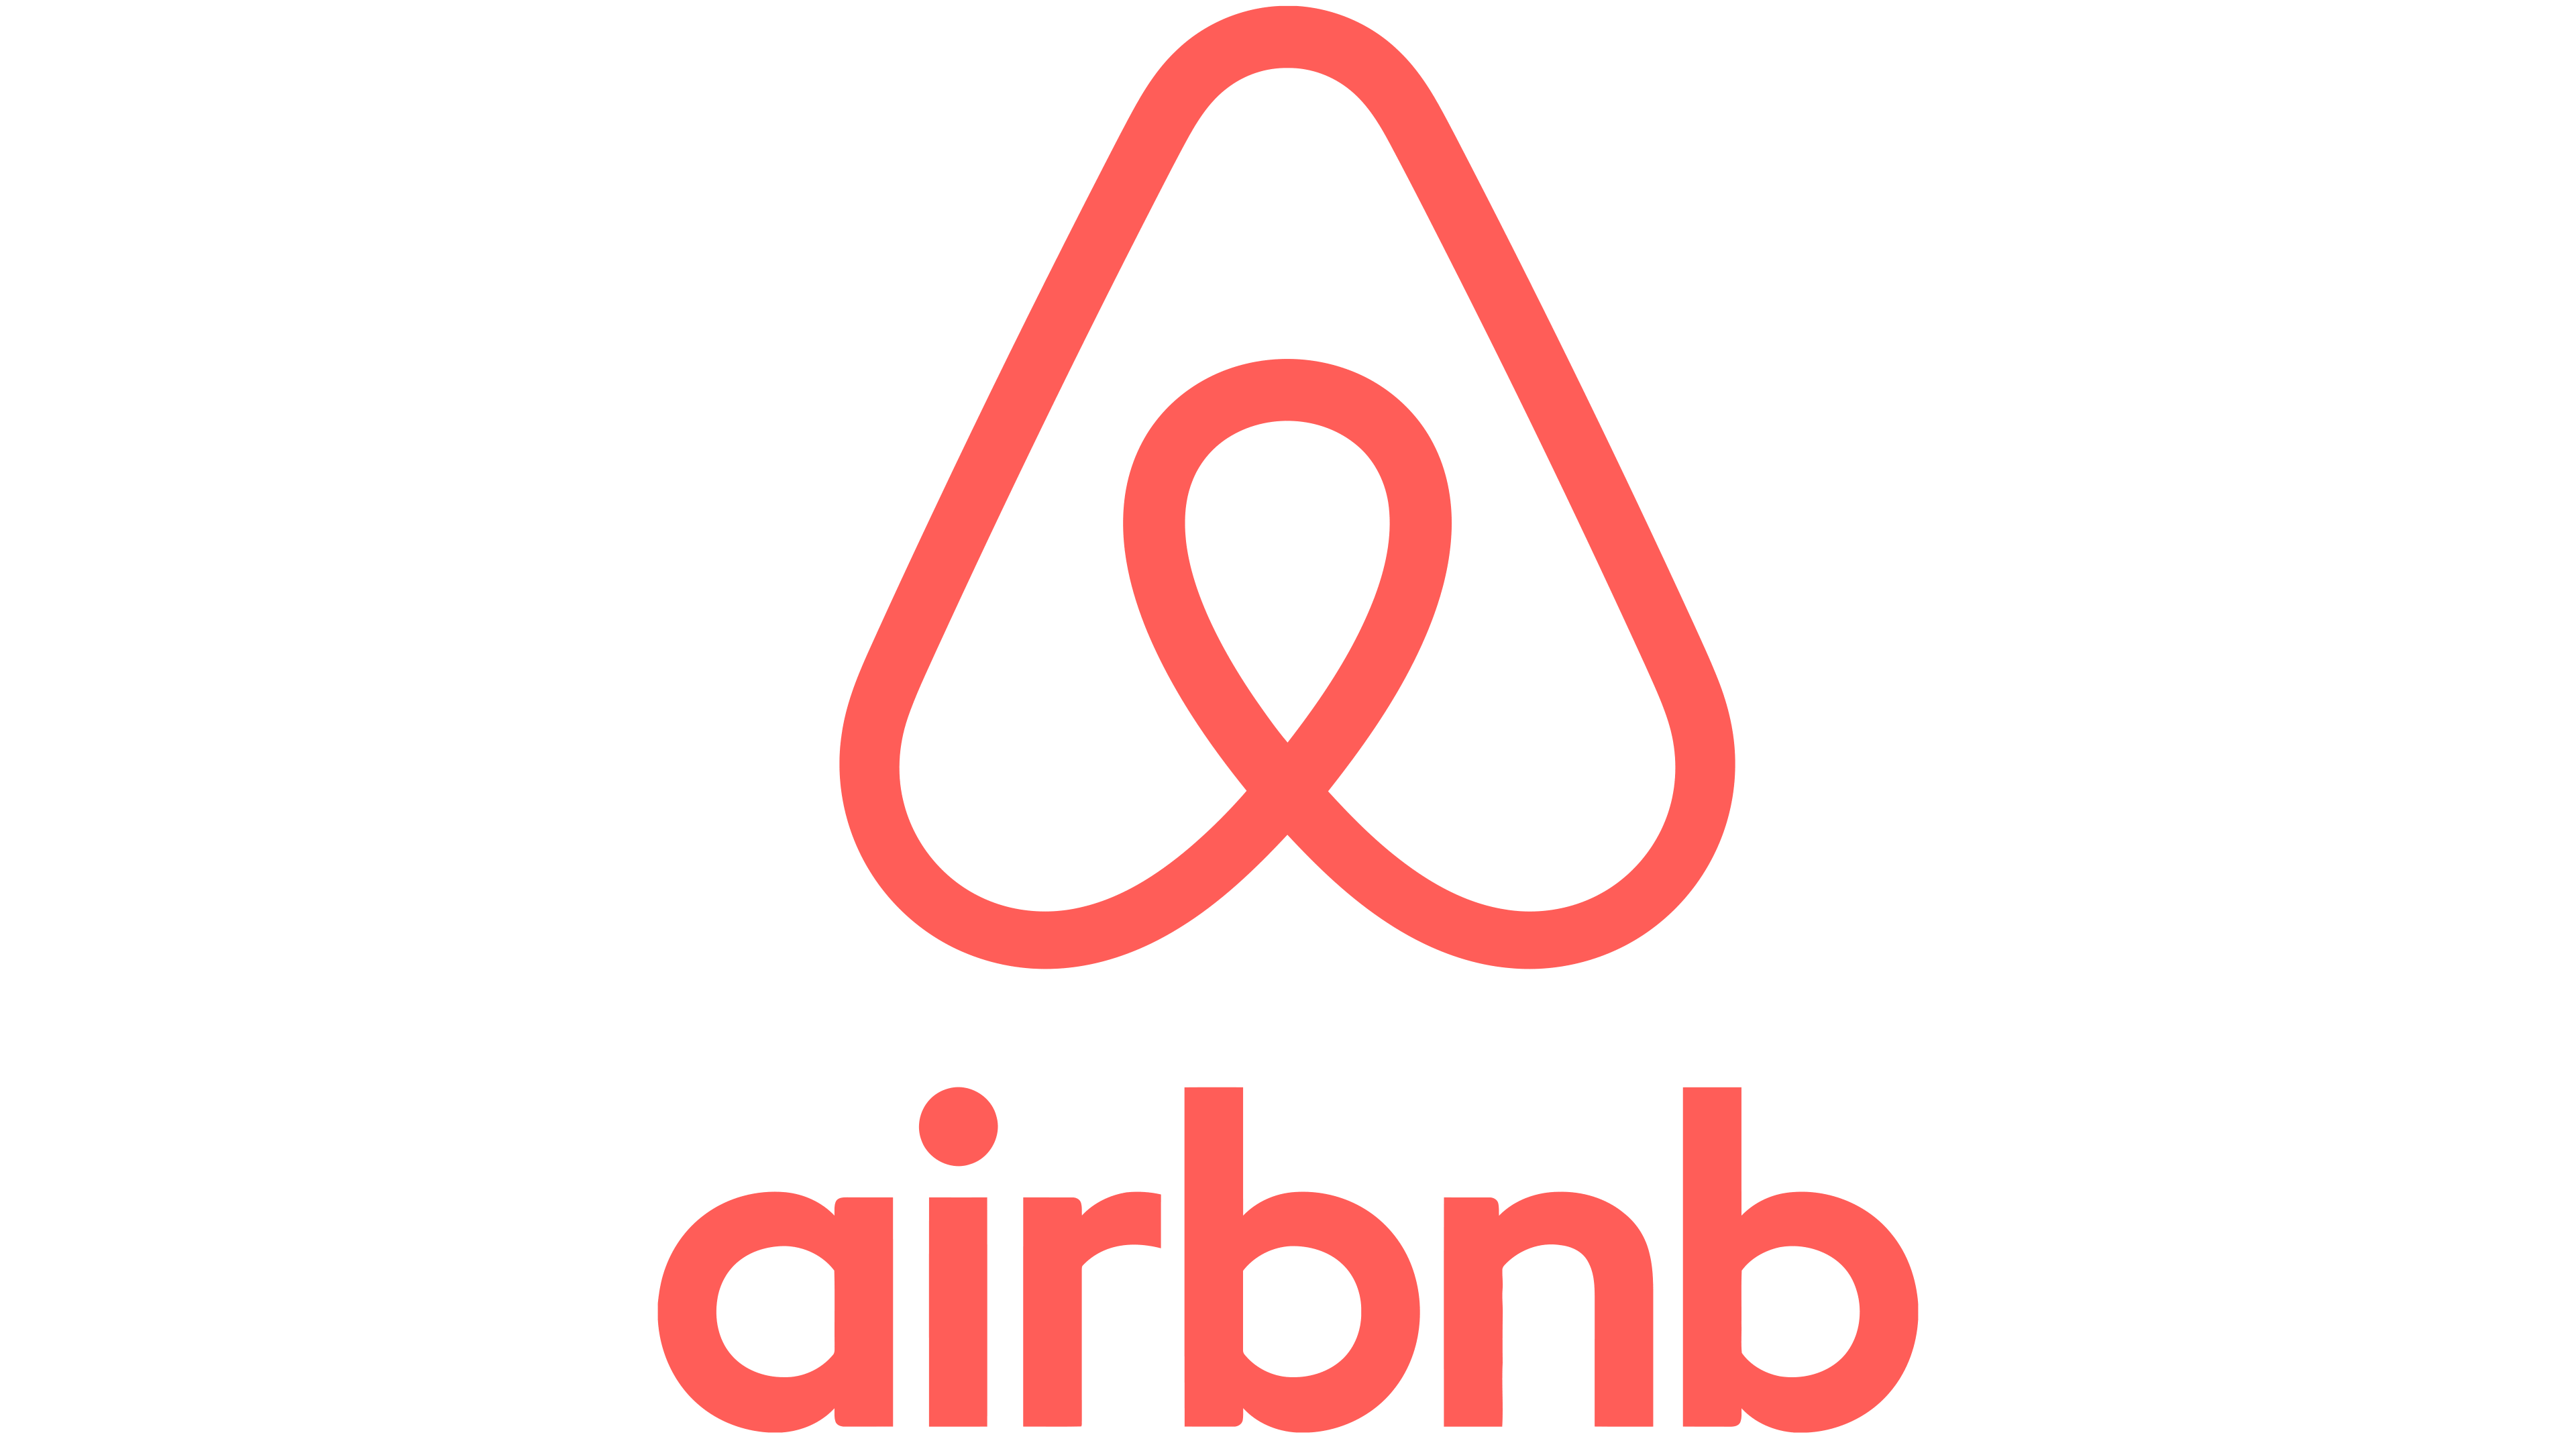

**Solution**

<center><b><h4>"Torture the Data and it will confess to anything"</b></center>
<p align=right><b>- Ronald Coase</b>, Economist,Nobel Prize Laureate</p><br>

>Hello Coders and Readers, this project is about Exploratory Data analysis of <b>"Airbnb booking analysis of New York City"</b>.We will follow stepwise approach to find the key insights from the given dataset.

**What is Airbnb?**
>Airbnb is an online marketplace for short-term homestays and experiences.Founded in 2008,it acts as a broker and charges a commission from each booking.Airbnb is a shortened version of its original name AirBedandBreakfast.com.

- It is available in 65000 cities and over 191 countries around the world.
- In 2021,Airbnb generated $5.9 billion revenue.
- Airbnb has 150 million users.
- There are over seven million listings on Airbnb,run by four million hosts.


**What is Exploratory Data Analysis?**
> Exploratory Data Analysis (EDA) is the process of understanding the data sets by summarizing their main characteristics often plotting them visually.Plotting in EDA consists of Histograms,Box plot,Scatter plot and many more.

For Data Analysis,EDA is the first step.It helps us to -
- To get insights into a data set.
-Undestand the underlying structure.
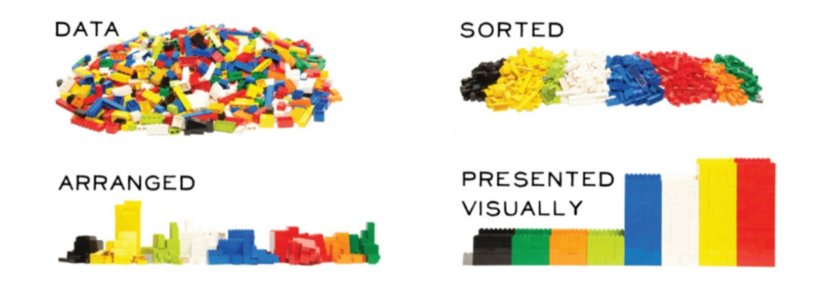
- Test the underlying assumptions.
- Extract the important parameters and relationships that hold between them .

**Steps in Exploratory Data Analysis**
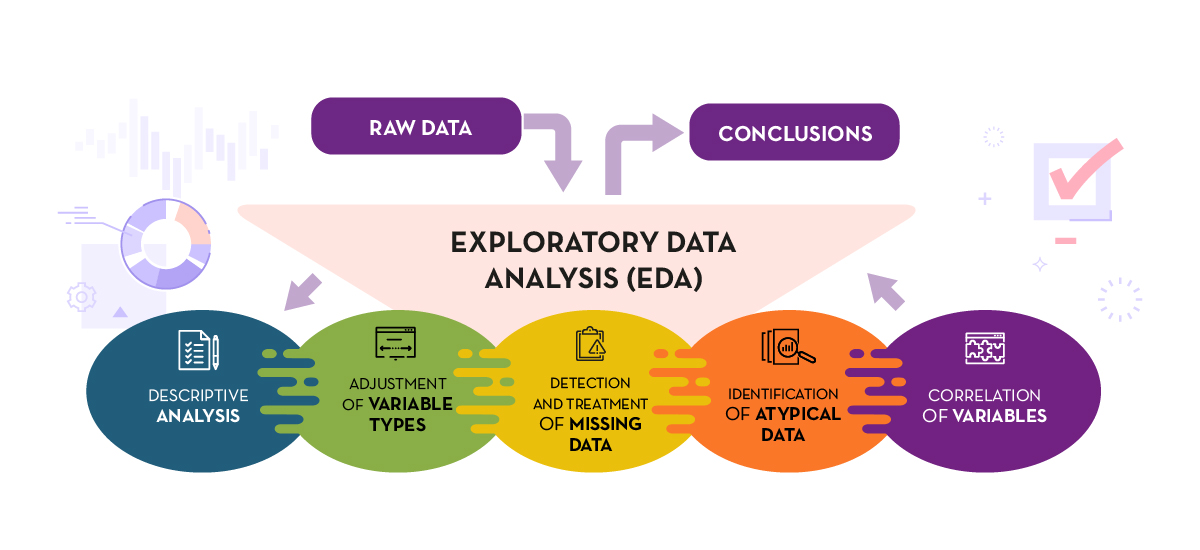


Let us look at the steps one by one.
> 1.<b> Descriptive analysis</b>
- **What is it?** Synthesis of the information provided by the dataset,extracting its most representative characteristics.
- **Why is it necessary?** To understand the types of data,discover patterns and prepare the data for future analysis.

> 2.<b> Adjustment of Variable types</b>
- **What is it?** Verify that the variables have been stored with the appropriate corresponding value type.
- **Why is it necessary?** Bad coding of variables can negatively influence the grouping of data or the results of the analysis.


> 3.<b> Detection and treating of Missing Data</b>
- **What is it?** Identify some of the missing data in the variable.
- **Why is it necessary?** Missing data can create probelms when applying machine learning techniques,building predictive models,performing statistical analysis or generating graphical representations.

> 4.<b> Detection and treatment of atypical Data</b>
- **What is it?**To identify data with values significantly different from those of the variable.
- **Why is it necessary?** They can modify the results and reduce the power of the statistical analyis or machine learning techniques applied.

> 4.<b> Correlation of variables</b>
- **What is it?** Analysing the relationship between two or more variables.
- **Why is it necessary?** Among the other reasons,to discard possible variables that provide redundant information in the dataset,causing noise in the analysis.



**First let us mount the drive to colab notebook**

In [65]:
#mounting drive to colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Now import the necessary libraries for Exploratory Data Analysis.**

In [66]:
#import the necessary libraries for EDA

#numpy to work with arrays
import numpy as np

#pandas for data wrangling
import pandas as pd

# matplotlib and seaborn for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

#to make plots appear in notebook
%matplotlib inline

**Use pandas function "read_csv" to read the .csv file (Airbnb NYC 2019.csv) for Data Analysis.**

In [67]:
#location where project files are kept
file_path="/content/drive/MyDrive/EDA1/"

#create the dataframe for Airbnb dataset
df=pd.read_csv(file_path+"Airbnb NYC 2019.csv")


**Create a copy of the dataset**
> Before performing operations on the original dataset we will keep a backup copy of the data so that we don't lose the original data. 

In [68]:
#backup the data
backup_data=df.copy()
backup_data.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


**To visualize top 5 observations**

In [69]:
#print the first 5 observations along with feature names
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**To visualize bottom 5 observations**

In [70]:
#print the last 5 observations along with feature names
df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


**Remove duplicates**

In [71]:
#to remove duplictes if any duplicated rows are present
a=df.duplicated().sum()
df.drop_duplicates(inplace=True)



**Step 1: Descriptive Analysis**
> To get a precise summary of Dataframe,pandas info() function is used.

In [72]:
#to get basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [73]:
#print feature names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [74]:
#to know how many different neighbourhoods are present
len(df.neighbourhood.unique())

221

In [75]:
#to know which all neighbourhood groups are present
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [76]:
#types of room
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

**<u>Data summary**</u>
> The given dataset has **48,895 observations and 16 different features.**
> Let us look what each feature is all about
> 1. <code><b> id </b></code>  id given to listings
> 2. <code><b>name</b></code>  name of the listing
> 3. <code><b> host_id </b></code> unique host ids
> 4. <code><b> host_name </b></code>  Gives host name
>5. <code><b> neighbourhood_group </b></code> It contains 5 neighbourhood groups namely : Brooklyn,Manhattan,Queens,Staten island,Bronx.
>6. <code><b> neighbourhood </b></code> There are total of 221 different neighbourhoods.
> 7. <code><b> latitude </b></code> It gives the latitude of house listing.It helps in getting the location.
> 8. <code><b> longitude </b></code> It gives the longitude of the house listing.It helps in getting the location.
>9. <code><b> room_type </b></code> There are total of 3 different types of rooms available on Airbnb.i,e.,Private room,Entire home or apartment and shared room.
> 10. <code><b> price </b></code> It tells about the price of each listing
> 11. <code><b>minimum_nights</b></code> It tells about minimum nights spent by people in listing
> 12. <code><b>number of reviews</b></code> It gives the total number of reviews
> 13. <code><b>last_review </b></code> It tells about when the last review was given
> 14. <code><b>reviews_per_month</b></code> It tells about review got by listing  per month
> 15. <code><b> calculated_host_listings</b></code> It tells about the number of times a host was listed or booked by people
> 16. <code><b>availability_365  </b></code> It tells about availability of listing out of 365 days


**Step 2:Adjustment of Variable types**

In [77]:
#to fetch the datatypes of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see that datatype of columns is same as what is expected.
> For example 
 - id,host_id,price,number_of_reviews,calculated_host_listings_count,availability_365  are supposed to be integer datatypes and they are in actual int64.So they are compliant.
 -name,host_name,neighbourhood_group,neighbourhood,room_type,last_review are supposed to be characters and they are "object" datatype.
 - latitude,longitude are supposed to be floats and in the given dataset they are float64.

 >So the dataset doesn't need to be adjusted for variable types

**Step 3: Detection and treating of missing data**

In [78]:
#find if any feature has null value
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

>**name** and **host_name** column have 16 and 21 null values respectively.

>**last_review** and **reviews_per_month** each has 10,052 observations as null.

>- In this case we observe that "id","name " and "host_name" are redundant for us as we will be referring to listings based on unique **host_id**.So we will be dropping "name " and "host_name" features.

>- "last_review" feature depicts the date on which last review was given for the listing,it is irrelevant here.So we will be getting rid of this feature.

In [79]:
df.drop(["id","name","host_name","last_review"],axis=1,inplace=True)

Few of the listings have missing value for "reviews_per_month" ,as the value is unknown we will be using zero (0) so that missing values don't intervene with our analysis.

In [80]:
df.fillna({"reviews_per_month":0},inplace=True)
df.reviews_per_month.isnull().sum()

0

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

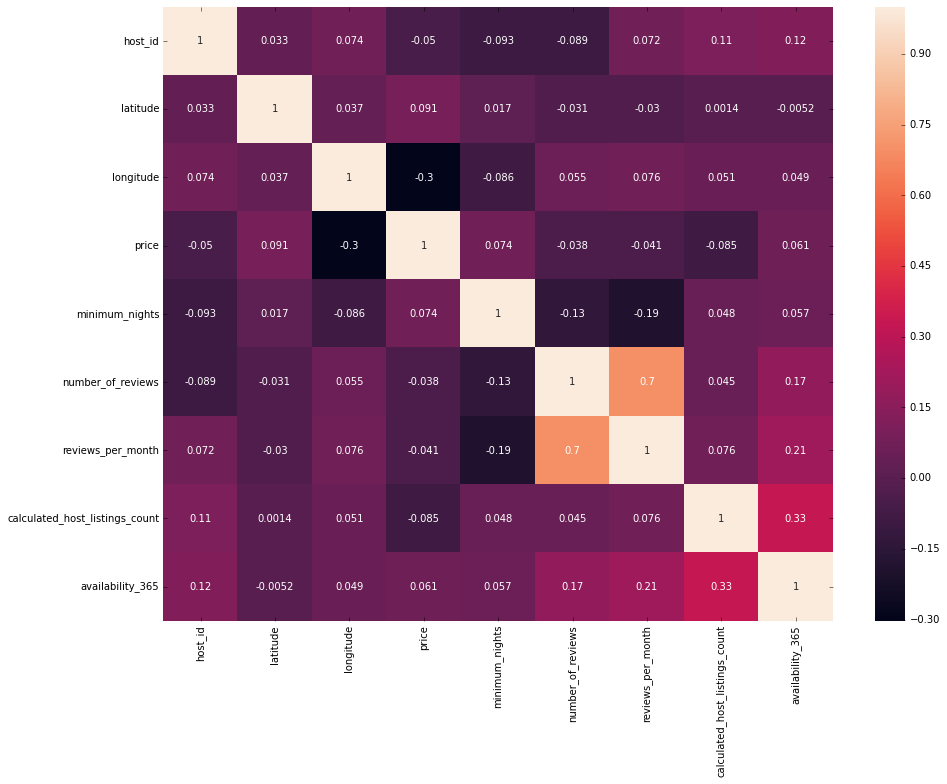

In [81]:
corr=df.corr(method="kendall")
plt.figure(figsize=(15,11))
sns.heatmap(corr,annot=True)
df.columns

In [82]:
#to recheck if all missing values have been treated
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We can see that there are no columns with any missing values now,all have been properly handled.

**Time to visualize data**

After cleaning data,Now it's time to explore and visualize data to get some insights and get answers to the following questions:
1. What can we learn about different hosts and areas?
2. What can we learn from predictions?
>2.1 Type of room

 >2.2 locations,

 >2.3 prices,

 >2.4 reviews
3. Which hosts are the busiest and why?
4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?
*  </b>

**1. What can we learn about different hosts and areas?**

In [83]:
#to find number of hosts in a neighbourhood group
host_per_location=df.groupby("neighbourhood_group")["host_id"].count()
host_per_location

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: host_id, dtype: int64

Text(0.5, 1.0, 'Number of hosts per neighbourhood_group')

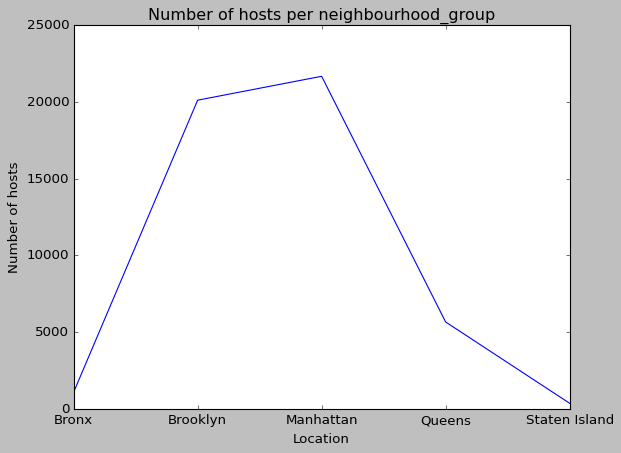

In [97]:
#plot the number of hosts per neighbourhood_group
plt.plot(host_per_location)
plt.xlabel("Location")
plt.ylabel("Number of hosts")
plt.title("Number of hosts per neighbourhood_group")

**Observation**
- Most of the hosts are located in Manhattan.i.e.,about 21661 hosts.
- Least number of hosts are in Staten island i.e., about 373 hosts.

**2.What can we learn from predictions? (ex:locations,prices,reviews,type of room)**

**2.1 Prediction based on type of room**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


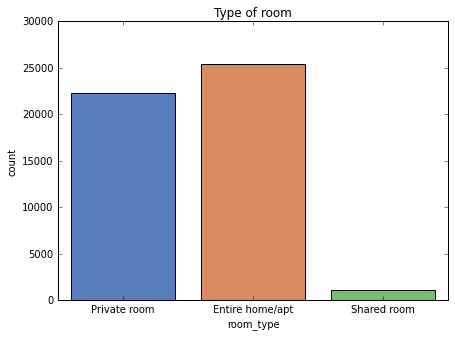

In [85]:
#number of listings based on type of room
plt.figure(figsize=(7,5))
plt.title("Type of room")
sns.countplot(df.room_type,palette="muted")
plt.show()


**Observation** :
- On Airbnb 3 different types of rooms are available for booking.They are **Private room,Entire home/apartment and Shared rooms**
-  Most people opt for Entire home/apartment type of listing.
- Shared rooms are the least sought out option on Airbnb.

**2.2 Prediction based on Price**

In [86]:
#Average prices/neighbourhood_group for all room types
average_price=df.groupby(["neighbourhood_group","room_type"],as_index=False)["price"].mean().rename(columns={"price":'Average_Price'})
average_price

,neighbourhood_group,room_type,Average_Price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [87]:
#Unstacking the neighbourhood_group for visually aesthetic bar graph
average_price=df.groupby(["neighbourhood_group","room_type"])["price"].mean().unstack()
average_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


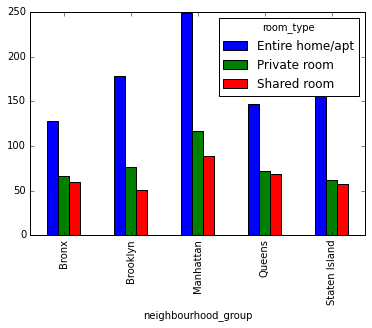

In [88]:
#Visualizing average price for each type of room in all 5 neighbourhoods
average_price.plot.bar()

**Observation**:
- Average price is highest for Entire home or apartment in Manhattan.
- Among all 5 neighbourhood_groups ,highest price is for Entire home or apartment.
- Among all 5 neighbourhood_groups , lowest price is for Shared rooms.



**2.3 Prediction based on location**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


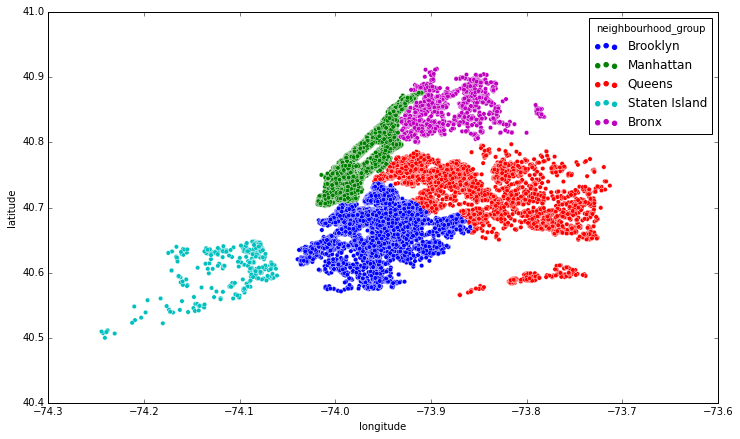

In [89]:
#Visualization of location using scatterplot
plt.figure(figsize=(12,7))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

**Observation** 
>From the location scatterplot we can see that area occupied by Airbnb in Queens is highest and Manhattan is lowest.But still maximum of hosts are located in Manhattan.

> Using scatterplot for latitude and longitude we can map how the listings are located.

 **3. Which hosts are the busiest and why?**

In [90]:
#Top 5 busiest hosts in different neighbourhood groups
hosts_neighbourhood_group=df.groupby(["host_id","neighbourhood_group"])["calculated_host_listings_count"].max().reset_index()
hosts_neighbourhood_group=hosts_neighbourhood_group.sort_values(by="calculated_host_listings_count",ascending=False).head(5)
hosts_neighbourhood_group

,host_id,neighbourhood_group,calculated_host_listings_count
34757,219517861,Manhattan,327
29494,107434423,Brooklyn,232
29495,107434423,Manhattan,232
19636,30283594,Manhattan,121
31172,137358866,Brooklyn,103


Text(0, 0.5, 'Total lsitings')

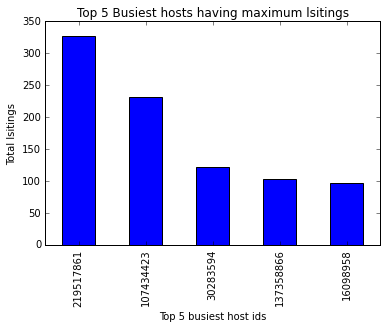

In [91]:
#to visualize busiest hosts
top_hosts=df["host_id"].value_counts()[:5]
top_hosts.plot(kind="bar")
plt.title("Top 5 Busiest hosts having maximum lsitings")
plt.xlabel("Top 5 busiest host ids")
plt.ylabel("Total lsitings")


**Observation** : **host_id 219517861** is the busiest host with total of **327 listings** in Manhattan.

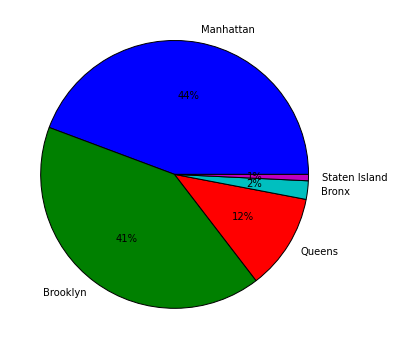

In [92]:
plt.subplots(figsize=(12,6))
data=df.neighbourhood_group.value_counts()
plt.pie(data,labels=df.neighbourhood_group.value_counts().index,autopct="%.0f%%")
plt.show()


**Observation** 
> - Most of the hosts own listings in Manhattan (44%)and then followed by Brooklyn(41%).
> - List number of hosts own property in Staten island(1%).

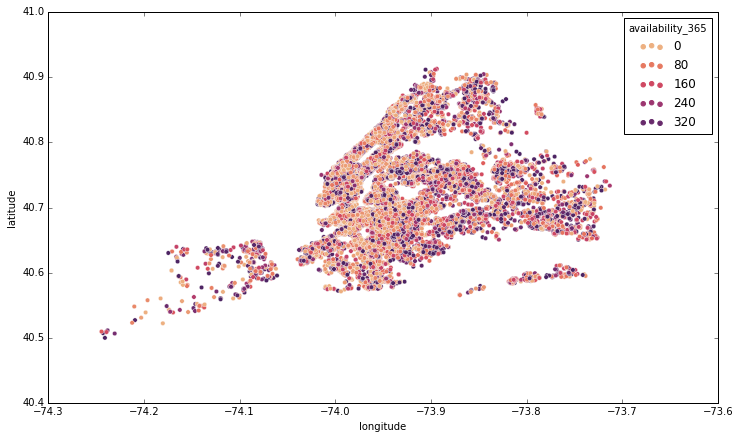

In [93]:
plt.figure(figsize=(12,7))
sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.availability_365,palette="flare")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


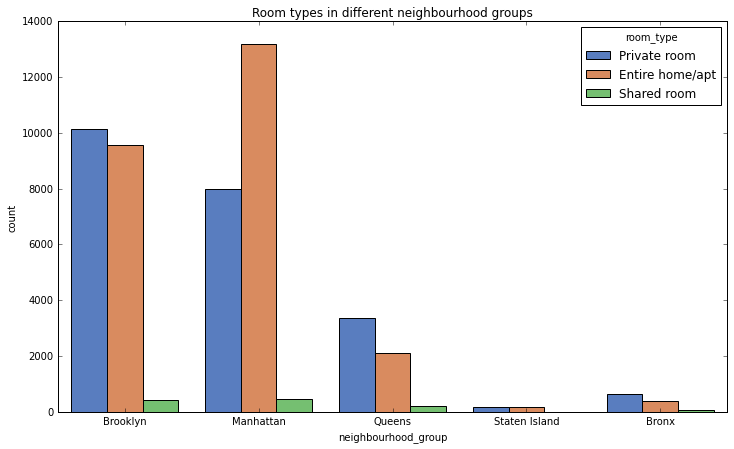

In [94]:
plt.figure(figsize=(12,7))
plt.title("Room types in different neighbourhood groups")

sns.countplot(df.neighbourhood_group,hue=df.room_type,palette="muted")

plt.show()

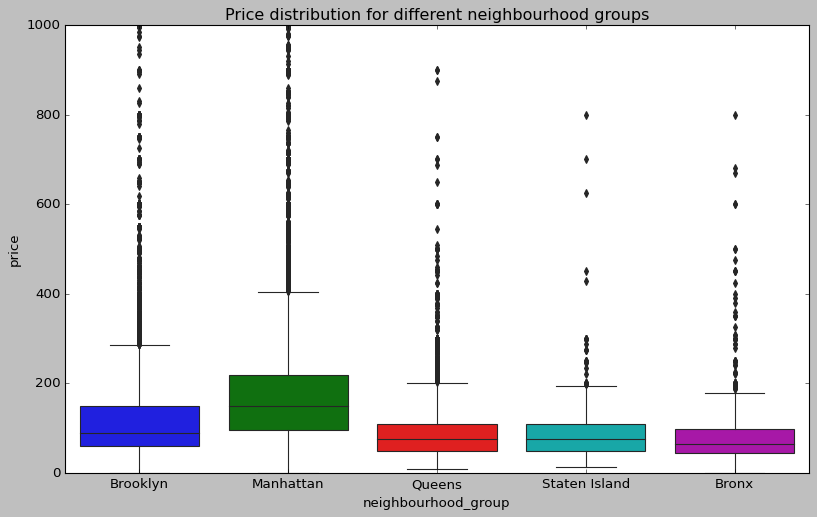

In [95]:
plt.style.use("classic")
plt.figure(figsize=(12,7))
plt.title("Price distribution for different neighbourhood groups")
sns.boxplot(y="price",x="neighbourhood_group",data=df[df.price<1000])
plt.show()